### Trabalho Prático

##### Alunos

- Arnaldo Antônio Inácio Silva
- Eduardo Henrique Pessoa Alves
- Gabriel Mendes Oliveira Pedrosa da Costa 
- Lucas Freitas de Barros

##### Disciplina

Processamento Digital de Imagem

### Objetivo

Criar um sistema para abrir, manipular e salvar imagens RGB com 24 bits/pixel (8 bits/componente/pixel).

O sistema deve:

1. Correlacionar uma máscara m x n com __offset__, sobre R, G e B. O offset e o filtro (dimensões e valores da máscara) são definidos em um arquivo (.txt) a parte com a estrutura descrita abaixo.

<span style="letter-spacing: 3px;">m, n, offset</span>  
<span style="letter-spacing: 3px;">X<sub>0,0</sub> X<sub>0,1</sub> X<sub>0,2</sub> ... X<sub>0,n-1</sub></span>  
<span style="letter-spacing: 3px;">X<sub>1,0</sub> X<sub>1,1</sub> X<sub>1,2</sub> ... X<sub>1,n-1</sub></span>  
<span style="letter-spacing: 3px;">X<sub>2,0</sub> X<sub>2,1</sub> X<sub>2,2</sub> ... X<sub>2,n-1</sub></span>  
...  
<span style="letter-spacing: 3px;">X<sub>m-1,0</sub> X<sub>m-1,1</sub> X<sub>m-1,2</sub> ... X<sub>m-1,n</sub></span>

Além disso, os filtros:

- Gaussiano 5x5
- Sobel horizontal
- Sobel vertical

Devem ser utilizados com extensão por zeros. 

O valor absoluto deve ser aplicado na visualização do sobel, juntamente com a expansão de histograma para [0, 255].

2. O filtro pontual abaixo, (a) aplicado em RGB, (b) aplicado à banda Y do YIQ, com conversão posterior para RGB.

![Filtro Pontual](filtropontual.png)

## Código

##### Importando bibliotecas

As bibliotecas necessárias são importadas e baixadas caso não estejam presentes.

In [16]:
import importlib
import subprocess
import sys
import numpy as np
import cv2

def install_and_import(package, alias=None, install_name=None):
    try:
        if alias:
            globals()[alias] = importlib.import_module(package)
        else:
            globals()[package] = importlib.import_module(package)
        print(f'O pacote "{package}" já está instalado.')
    except ImportError:
        install_name = install_name or package
        print(f'O pacote "{package}" não está instalado. Instalando "{install_name}" agora...')
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', install_name])
        if alias:
            globals()[alias] = importlib.import_module(package)
        else:
            globals()[package] = importlib.import_module(package)

# Pacotes a serem verificados/instalados
packages = [
    ('numpy', 'np'),
    ('matplotlib.pyplot', 'plt', 'matplotlib'),
    ('PIL.Image', 'Image', 'Pillow')
]

for package_info in packages:
    install_and_import(*package_info)

O pacote "numpy" já está instalado.
O pacote "matplotlib.pyplot" já está instalado.
O pacote "PIL.Image" já está instalado.


##### Abrindo, mostrando e salvando imagens

Aqui, apenas operações de abrir, salvar e mostrar imagens são aplicadas, sem utilizar qualquer processamento.

In [18]:
# Função para carregar a imagem e obter as dimensões
def load_image(path):
    img = Image.open(path)
    img = np.array(img)
    return img

# Função para exibir a imagem
def display_image(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Função para salvar a imagem
def save_image(img, path):
    img = Image.fromarray(img)
    img.save(path)

In [19]:
# Funções de conversão RGB para YIQ e vice-versa
def rgb_to_yiq(rgb):
    transformation_matrix = np.array([[0.299, 0.587, 0.114],
                                      [0.596, -0.275, -0.321],
                                      [0.211, -0.523, 0.312]])
    yiq = np.dot(rgb, transformation_matrix.T)
    return yiq

def yiq_to_rgb(yiq):
    transformation_matrix = np.array([[1.0, 0.956, 0.621],
                                      [1.0, -0.272, -0.647],
                                      [1.0, -1.106, 1.703]])
    rgb = np.dot(yiq, transformation_matrix.T)
    return np.clip(rgb, 0, 255).astype(np.uint8)

In [20]:
def expand_histogram(img):
    # Calcula o histograma da imagem
    hist, _ = np.histogram(img.flatten(), bins=256, range=[0,256])
    
    # Calcula a função de distribuição acumulada (CDF)
    cdf = hist.cumsum()
    
    # Normaliza a CDF para o intervalo [0, 255]
    cdf_normalized = cdf * 255 / cdf[-1]
    
    # Aplica a CDF normalizada para expandir o histograma
    img_expanded = cdf_normalized[img.astype(np.uint8)]
    
    return img_expanded.astype(np.uint8)

In [21]:
def read_kernel_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Leitura do kernel do arquivo
    kernel = np.array([list(map(int, line.split())) for line in lines])
    
    return kernel


In [23]:
def apply_sobel_filter_with_expanded_histogram(img):
    # Expande o histograma da imagem
    img_expanded = expand_histogram(img)
    
    # Lê os kernels de Sobel dos arquivos
    kernel_sobel_x = read_kernel_from_file('sobel_X.txt')
    kernel_sobel_y = read_kernel_from_file('sobel_Y.txt')
    
    # Aplica os filtros de Sobel na imagem expandida
    sobel_x_filtered_img = cv2.filter2D(img_expanded, -1, kernel_sobel_x)
    sobel_y_filtered_img = cv2.filter2D(img_expanded, -1, kernel_sobel_y)
    
    return sobel_x_filtered_img, sobel_y_filtered_img

##### Mostrando imagens

As imagens são carregadas nas suas respectivas variáveis.  
A imagem `testpat.1k.color2.tif` é atribuída à variável `imgTif` e em seguida mostrada.  
O mesmo é feito em relação à imagem `Shapes.png`, que é atribuída à variável `imgPng`.

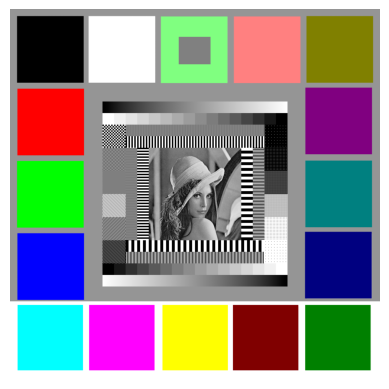

In [52]:
# carregar e processar imagem
imgTif = load_image('testpat.1k.color2.tif')
display_image(imgTif)

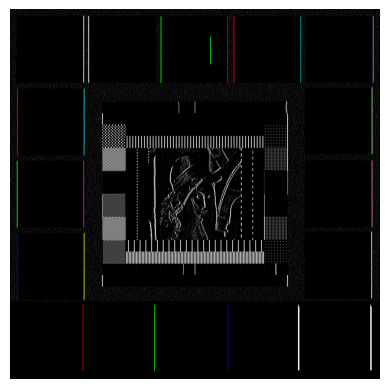

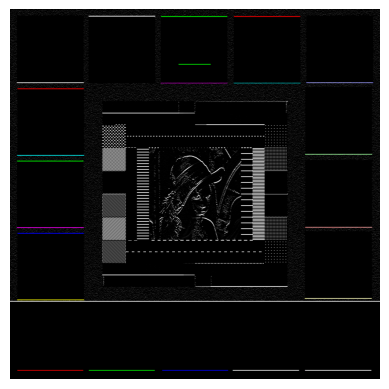

In [53]:
# Aplica o filtro de Sobel com expansão de histograma
sobel_x_filtered_img_expanded, sobel_y_filtered_img_expanded = apply_sobel_filter_with_expanded_histogram(imgTif)

save_image(sobel_x_filtered_img_expanded, 'testpat.1k.color2.sobelX.tif')
save_image(sobel_y_filtered_img_expanded, 'testpat.1k.color2.sobelY.tif')


imgSobelX = load_image('testpat.1k.color2.sobelX.tif')
display_image(imgSobelX)

imgSobelY = load_image('testpat.1k.color2.sobelY.tif')
display_image(imgSobelY)



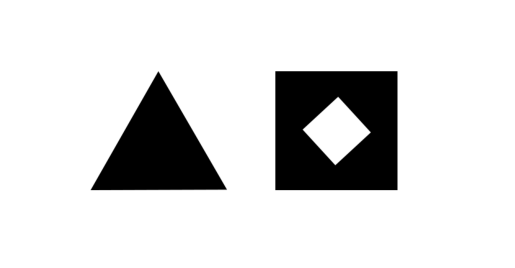

In [29]:
imgPng = load_image('Shapes.png')
display_image(imgPng)